In [1]:
import numpy as np
data = np.load('data.npz')
imgs = data['imgs']
imgs[0].shape

(250, 250, 1)

In [2]:
blurred_imgs = data['blurred_imgs']
blurred_imgs[0].shape

(250, 250, 1)

In [8]:
torch.from_numpy(imgs).to('cuda:0')
torch.from_numpy(blurred_imgs).to('cuda:0')


tensor([[[[-1.1082e-16],
          [-1.2046e-16],
          [-1.2941e-16],
          ...,
          [-1.3228e-16],
          [-1.2269e-16],
          [-1.1250e-16]],

         [[-8.1454e-17],
          [-9.7445e-17],
          [-1.1368e-16],
          ...,
          [-1.8274e-16],
          [-1.6632e-16],
          [-1.4931e-16]],

         [[-1.1651e-16],
          [-1.3527e-16],
          [-1.5327e-16],
          ...,
          [-1.4340e-16],
          [-1.2527e-16],
          [-1.0696e-16]],

         ...,

         [[ 6.6770e-17],
          [ 6.3723e-17],
          [ 5.9643e-17],
          ...,
          [-9.5938e-17],
          [-7.8736e-17],
          [-6.1511e-17]],

         [[-1.8878e-16],
          [-1.9283e-16],
          [-1.9719e-16],
          ...,
          [-2.0260e-16],
          [-1.9533e-16],
          [-1.8842e-16]],

         [[-9.8881e-17],
          [-9.9979e-17],
          [-1.0095e-16],
          ...,
          [-1.1690e-16],
          [-1.1237e-16],
          

In [6]:
# tensorをgpuに送ってみて、メモリアロケートエラーが起こらないか。
import torch
i = 0
while True:
    try:
        torch.from_numpy(imgs[0]).to('cuda:0')
        i += 1
    except Exception:
        print(i)

KeyboardInterrupt: 

In [25]:
import torch
import numpy as np
from scipy.signal import fftconvolve
from train_agent import get_gauss_filt

kernel1 = get_gauss_filt(np.diag([2.0**2]*2), size=9)
print('kernel type is ', type(kernel1))
img = imgs[0, :, :, 0]
# blur 
blurred_img = fftconvolve(img, kernel1, mode='same')
print('blurred shape is ', blurred_img.shape)

# --- VS torch convolution
# convert numpy kernel to torch tensor
img = torch.from_numpy(img).to(torch.float)[None, None, ...]
kernel1_tensor = torch.from_numpy(kernel1).to(torch.float)[None, None, ...]
# blur by torch convolution
print(kernel1_tensor.shape)

blurred_img_tensor = torch.nn.functional.conv2d(img, kernel1_tensor, padding=4)
first = torch.from_numpy(blurred_img).to(torch.float)
print('check if these are equal', torch.allclose(first, blurred_img_tensor))

(9, 9)
kernel type is  <class 'numpy.ndarray'>
blurred shape is  (500, 500)
torch.Size([1, 1, 9, 9])
check if these are equal True


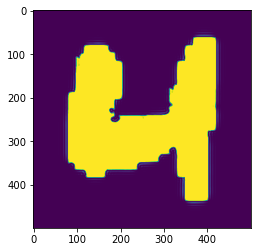

In [31]:
from skimage import restoration
from matplotlib import pyplot as plt
restore = np.maximum(0, restoration.wiener(blurred_img, kernel1, 1e-2))

plt.imshow(restore)

In [11]:
size = 10
print(-(size//2))
print(size//2+1)
print(np.arange(-5, 6, 1).shape)
X, Y = np.meshgrid(np.arange(-(size//2), size//2+1, 1, dtype=np.float32), np.arange(-(size//2), size//2+1, 1, dtype=np.float32))
X.shape

-5
6
(11,)


(11, 11)

(512, 512, 3)


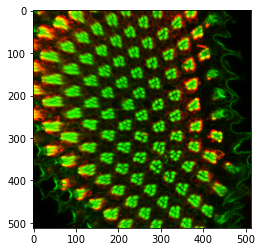

(512, 512, 3)


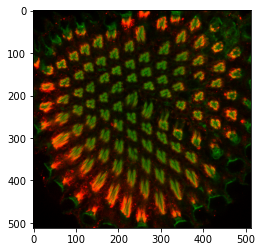

(512, 512, 3)


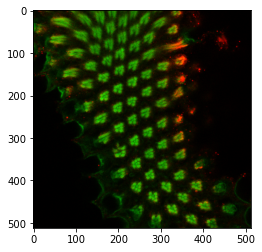

(512, 512, 3)


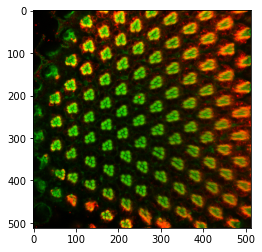

(512, 512, 3)


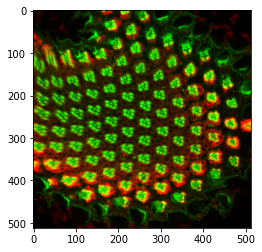

(512, 512, 3)


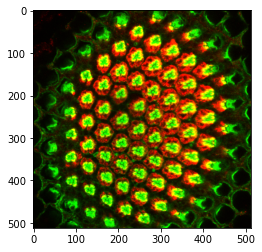

(512, 512, 3)


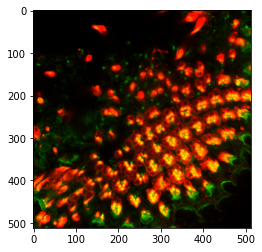

(512, 512, 3)


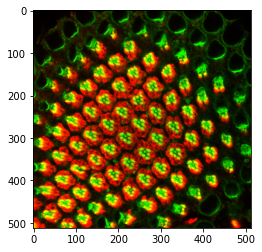

(512, 512, 3)


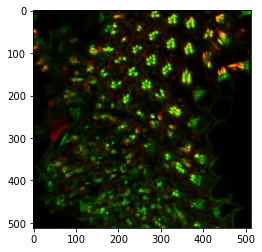

(512, 512, 3)


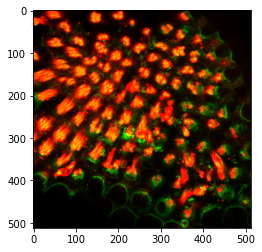

(512, 512, 3)


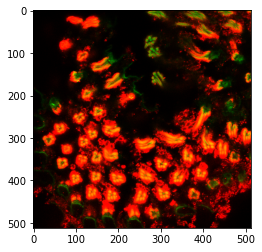

(512, 512, 3)


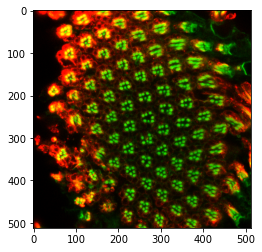

(512, 512, 3)


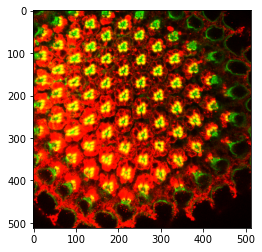

(1444, 1444, 3)


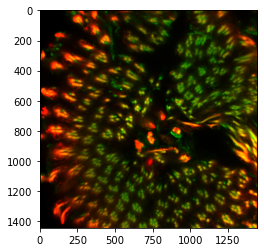

(360, 360, 3)


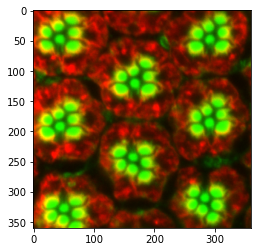

(360, 360, 3)


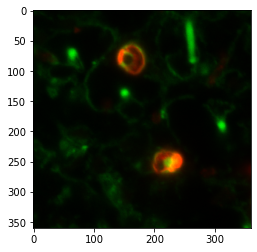

(512, 512, 3)


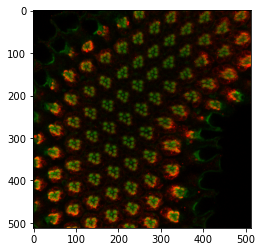

(512, 512, 3)


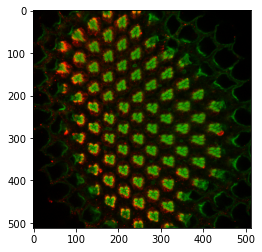

(512, 512, 3)


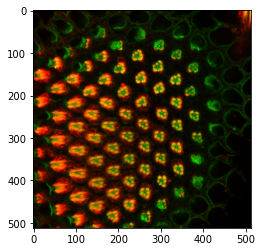

(512, 512, 3)


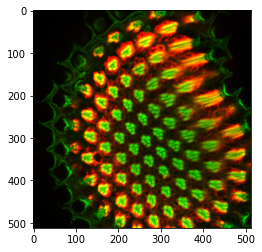

In [9]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from glob import glob

files = glob('Fig18/*.lsm')[:20]
for file in files:
    img = Image.open(file)
    img = np.asarray(img)
    print(img.shape)
    plt.imshow(img)
    plt.show()